In [1]:
#!pip install trafilatura

In [2]:
import os

import numpy as np
import pandas as pd

from lxml import html
from bs4 import BeautifulSoup
import trafilatura

In [3]:
#!npx degit kelu124/substack/.archive substack --force

In [4]:
files = os.listdir('.archive')
file_names = []
for name in files:
    if not ('type' in name):
        file_names.append(name)

In [5]:
D = pd.read_parquet('articles.parquet.gzip')

In [6]:
DONE = list(D.file_name)

In [7]:
import io

In [8]:
articles = []
errors = []
for file_name in file_names:
    if file_name not in DONE:
        with io.open(f'.archive/{file_name}', mode="r", encoding="utf-8") as f:
            try:
                mytree = html.fromstring("".join(f.readlines()))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)
                continue
            try:
                content = trafilatura.extract(mytree)
                articles.append((file_name, content))
            except Exception as e:
                print(file_name,e)
                errors.append(file_name)

1adf22e202e6fbf70cab0817e9900a63 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
90ff840ab083c871304f6c064a686163 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
ae139bd8ae8643afb759fbac296ee6f9 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
f0a23dcd98c2fdf0a3fd523a04e7c255 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
679dc202eff2e27018dc9d59ef4ab209 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
14d1644363556a7c406cd6c2b4b824b1 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
d5d984108e1458c134b8b5d1bb3a3baa 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
c6f072d0bb096cc48a03e042dc98a9d9 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
18cfbb0e23ac94c1ae56348a3663c73c 'lxml.etree._Element' object has no attribute 'text_content'
3cb0698c48f534f632b96a09dd33654c 'utf-8' codec can't decode byte 0

bf71558be9e9adbaeaa587c79c7fcecd 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
3b92dc627d73b0d586fcff194b697c89 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
627d69844d85a2a6340b218710657371 Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
74a2fddcca2cb42b3060ab6fb4c2ca83 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
93aeecc59e527115f472033b47c1392b 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
05509cb8cc71d73c0dbcc6aa96400354 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
d19f3b906dd57092b93d1829b06afe43 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
359a9b892f72b967ceee18d5c5d09516 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
896f5b5bf1698e66b4ef40a4acdf929b 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continu

7064777094b2830cfa57db605b35edeb 'lxml.etree._Element' object has no attribute 'text_content'
38b386d650b36968602147d0622c8a97 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
6949a42e55b42fed1b2ec46e58871c29 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
183f5f9f1b97d57b8b67743b4ee8befc 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
9e9f01e7a96d2c212695d42625d35638 'utf-8' codec can't decode byte 0x8f in position 10: invalid start byte
6dc62146f6db77f0a3b36e9a5c5ff06d 'utf-8' codec can't decode byte 0x94 in position 4479: invalid start byte
ad4e4b6e0af0a3d18fca1ff8628bfa3d 'lxml.etree._Element' object has no attribute 'text_content'
b8f69022ea3d57bb318782698bf05bdd 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
dcd23db7845235fe240f0ca01e874f34 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte
1e62125dbcc626a40f8f835f7b1380f1 'utf-8' codec can't decode byte 0xa0 in positio

In [9]:
NEW = pd.DataFrame(articles, columns = ['file_name', 'content'])
NEW["LEN"] = NEW["content"].apply(lambda x: len(str(x)))
NEW

,file_name,content,LEN
0,d07a9512bded6c5e9871608ec5edefec,How to craft better prompts. Four reasons we t...,1877
1,5282eeb0a4572878876a83f8fb1c632a,The META Trending Trends: 2024\nAnalysis of 70...,593
2,30353a701a13370e93f7369cc6b68c0b,Transnational security investigator Abdelkader...,22079
3,e35595ab3cf32e4dadb80ef02604e4ee,VUCA\nVUCA is an acronym based on the leadersh...,20093
4,1fd0845ff9239d74ce3f089d10cb2f61,Pi Pico Rx - A crystal radio for the digital a...,1863
5,4f2a3307c51f901338f1e8850c39b5b6,Abstract\nTransformer-based large language mod...,41270
6,ae76933bdab30de65d82f648247fa953,Imagine 2200: Climate Fiction for Future Ances...,721
7,640d39837dc8e43f91b8ec13a5720313,fastcompany.comPlease enable JS and disable an...,58
8,183f62ed162708e41c35b609767f0667,The Rise of Connector Roles in Data Science\nC...,2910
9,d73462d47098506eb9aa6c2b8cc180fb,"Last week, some voters in New Hampshire receiv...",6859


In [10]:
len(NEW),len(D)

(48, 1743)

In [11]:
df = pd.concat([NEW,D]).reset_index(drop=True)
len(df)
df

,file_name,content,LEN
0,d07a9512bded6c5e9871608ec5edefec,How to craft better prompts. Four reasons we t...,1877
1,5282eeb0a4572878876a83f8fb1c632a,The META Trending Trends: 2024\nAnalysis of 70...,593
2,30353a701a13370e93f7369cc6b68c0b,Transnational security investigator Abdelkader...,22079
3,e35595ab3cf32e4dadb80ef02604e4ee,VUCA\nVUCA is an acronym based on the leadersh...,20093
4,1fd0845ff9239d74ce3f089d10cb2f61,Pi Pico Rx - A crystal radio for the digital a...,1863
...,...,...,...
1786,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1787,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1788,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1789,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [12]:
df.to_parquet('articles.parquet.gzip',compression="gzip")

In [13]:
# More testing here about the coherent text that has to be found, find upper elements if p doesn't mention classes. 
# or merge everything than clean up.


In [51]:
df = pd.read_parquet('articles.parquet.gzip')
strs = ["detected unusual","enable JS", "nable Javascript","Checking your browser","mettre à jour votre navigateur","nable JavaScript","Adobe Acrobat JavaScript","please click the box below to","site connection is secure","Optica Publishing Group","switch to a supported browser"]
df = df[df['content'].astype(str).str.contains("|".join(strs))]
df.to_parquet("to_process_selenium.parquet.gzip",compression="gzip")

In [14]:
df = pd.read_parquet('articles.parquet.gzip')
df

,file_name,content,LEN
0,d07a9512bded6c5e9871608ec5edefec,How to craft better prompts. Four reasons we t...,1877
1,5282eeb0a4572878876a83f8fb1c632a,The META Trending Trends: 2024\nAnalysis of 70...,593
2,30353a701a13370e93f7369cc6b68c0b,Transnational security investigator Abdelkader...,22079
3,e35595ab3cf32e4dadb80ef02604e4ee,VUCA\nVUCA is an acronym based on the leadersh...,20093
4,1fd0845ff9239d74ce3f089d10cb2f61,Pi Pico Rx - A crystal radio for the digital a...,1863
...,...,...,...
1786,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1787,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1788,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489
1789,69637dcd83c48ebde0610a61a27b1989,The newest Kindle is the first truly new Kindl...,6249


In [15]:
# Removing unaccessible articles
df = df[~(df['content'] == "Please switch to a supported browser to continue using twitter.com. You can see a list of supported browsers in our Help Center.\nHelp Center\nTerms of Service\nPrivacy Policy\nCookie Policy\nImprint\nAds info\n© 2022 Twitter, Inc.")]
df = df[df.LEN >= 1500]
df

,file_name,content,LEN
0,d07a9512bded6c5e9871608ec5edefec,How to craft better prompts. Four reasons we t...,1877
2,30353a701a13370e93f7369cc6b68c0b,Transnational security investigator Abdelkader...,22079
3,e35595ab3cf32e4dadb80ef02604e4ee,VUCA\nVUCA is an acronym based on the leadersh...,20093
4,1fd0845ff9239d74ce3f089d10cb2f61,Pi Pico Rx - A crystal radio for the digital a...,1863
5,4f2a3307c51f901338f1e8850c39b5b6,Abstract\nTransformer-based large language mod...,41270
...,...,...,...
1785,3fbb11d6e949d1e662aa6a146bb6cda0,China’s growing number of insomniacs are turni...,2859
1786,e8b7faf708568f9f39abe04b778c4631,I would say my efficiency is up ~20% since sta...,14337
1787,b79a2baa87b68283198416791b93bce4,The U.S. government has restricted sales of Nv...,2125
1788,d89d7cc690ceaaafaecc9f40ff8230c5,My kids and I just played D&D with ChatGPT4 as...,34489


In [16]:
df.describe()

,LEN
count,1434.000000
mean,11518.371688
std,19589.588610
min,1505.000000
25%,3782.000000
50%,6845.500000
75%,12891.750000
max,496896.000000


In [17]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(df['content'])

# Check Shape of Count Vector
X_train_counts.shape

/home/kelu/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(1434, 1162742)

In [18]:
X_train_counts[0]

<1x1162742 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=10).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

In [20]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    # plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

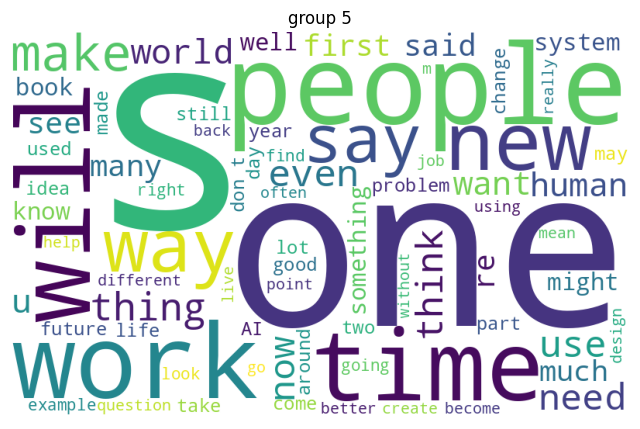

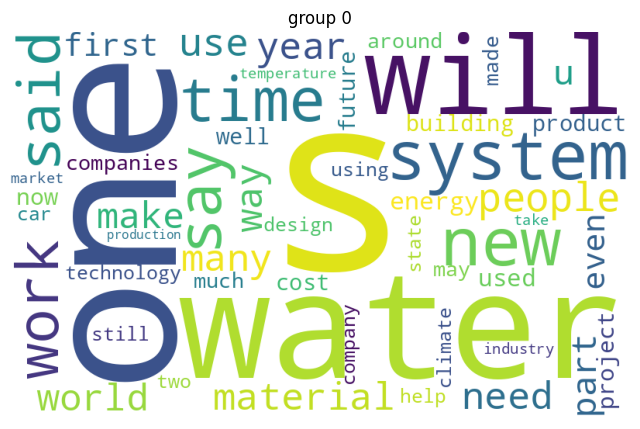

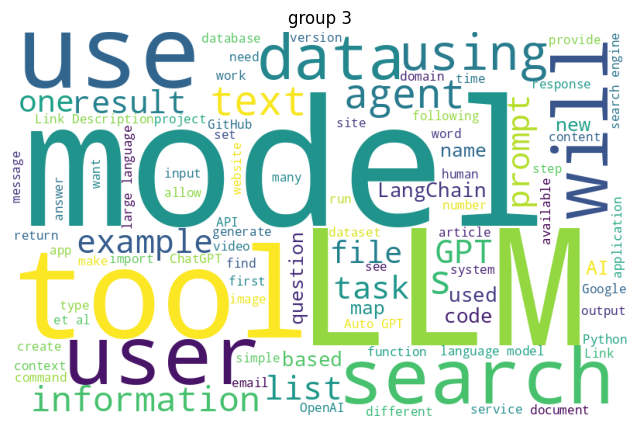

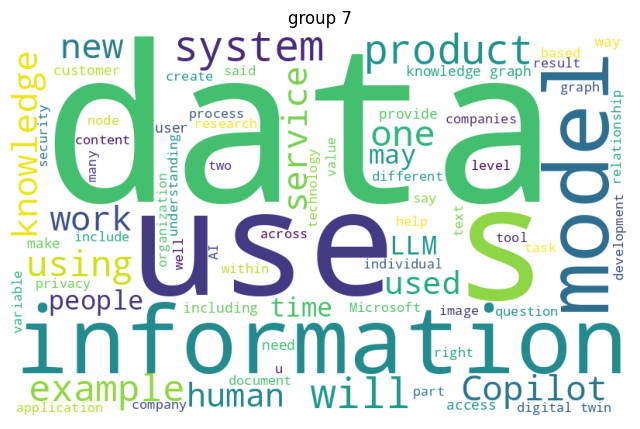

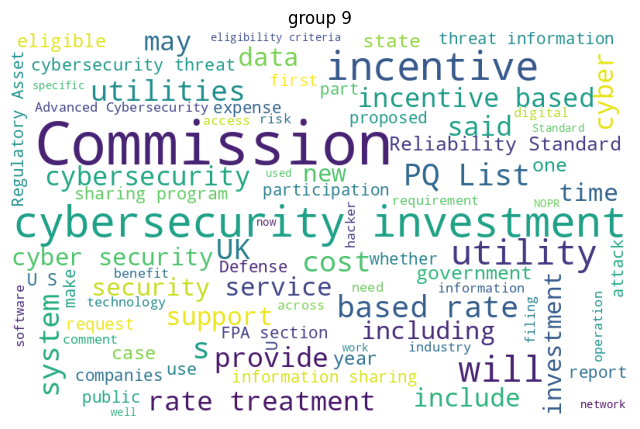

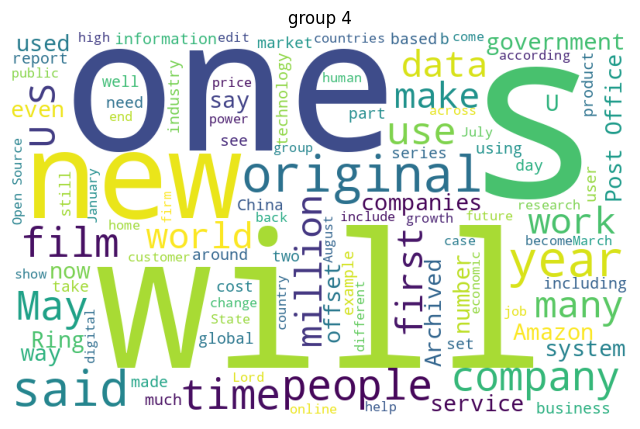

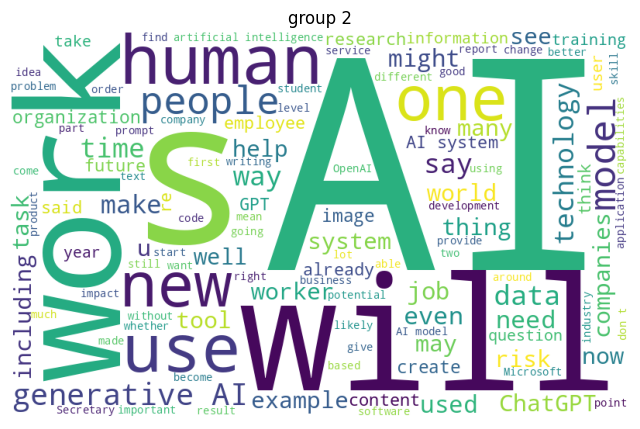

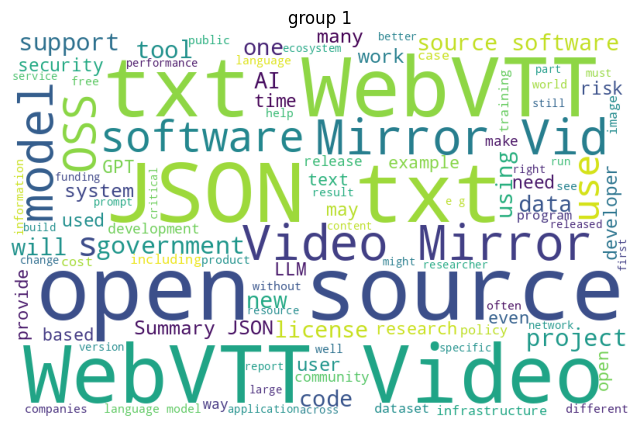

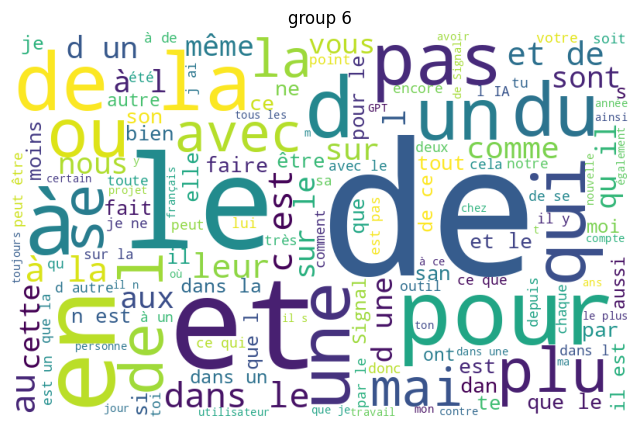

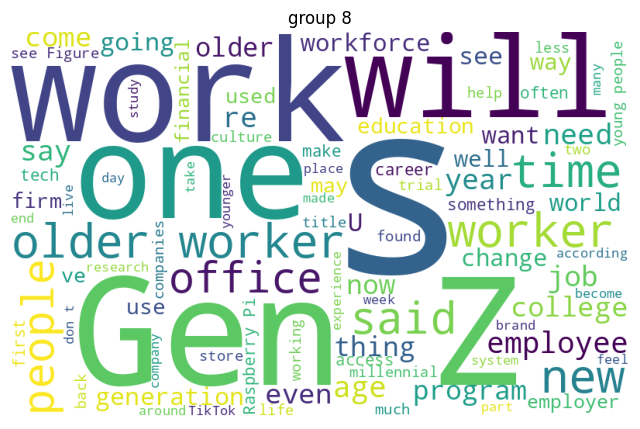

In [21]:
import pandas as pd
new_df=pd.DataFrame({"text":df['content'],"labels":pred_labels})


for i in new_df.labels.unique():
    new_new_df=new_df[new_df.labels==i]
    text="".join(new_new_df.text.tolist())
    word_cloud(text,f"group {i}",f'{i}.jpeg')

In [22]:
# new_df includes the category for errord ones as well.

# No context is given, so the group name is default to the group number.

# We can use the common words found in each group to formulate a title?
new_df.to_csv('grouped_articles.csv')

In [23]:
new_df

,text,labels
0,How to craft better prompts. Four reasons we t...,5
2,Transnational security investigator Abdelkader...,0
3,VUCA\nVUCA is an acronym based on the leadersh...,5
4,Pi Pico Rx - A crystal radio for the digital a...,5
5,Abstract\nTransformer-based large language mod...,3
...,...,...
1785,China’s growing number of insomniacs are turni...,4
1786,I would say my efficiency is up ~20% since sta...,5
1787,The U.S. government has restricted sales of Nv...,4
1788,My kids and I just played D&D with ChatGPT4 as...,5
